In [32]:
import numpy as np
import pandas as pd
import folium
import math 
import os
import time
import copy
import matplotlib.pyplot as plt

In [33]:
df1 = pd.read_csv("CaliforniaRoadNetwork_Edges.csv")
df2 = pd.read_csv("CaliforniaRoadNetwork_Nodes.csv")

In [34]:
df1

,EdgeID,StartNodeID,EndNodeID
0,0,0,1
1,1,0,6
2,2,1,2
3,3,2,3
4,4,3,4
...,...,...,...
21688,21688,21042,21043
21689,21689,21043,21044
21690,21690,21044,21045
21691,21691,21044,21047


In [35]:
df2

,NodeID,Longitude,Latitude
0,0,-121.904167,41.974556
1,1,-121.902153,41.974766
2,2,-121.896790,41.988075
3,3,-121.889603,41.998032
4,4,-121.886681,42.008739
...,...,...,...
21043,21043,-117.042160,32.550213
21044,21044,-117.043533,32.546886
21045,21045,-117.055840,32.553497
21046,21046,-117.067970,32.562462


In [36]:
# import folium
# m = folium.Map(
#     location=[41.974556, -121.904167],
#     zoom_start=7.5
    
# )
# for i in range(len(df2)):
#         m.add_child(
#         folium.CircleMarker(
#               [df2["Latitude"][i],df2["Longitude"][i]],
#              radius=2, # define how big you want the circle markers to be
#             color='yellow',
#             fill=True,
#             fill_color='red',
#              fill_opacity=1.5
#      )
#     )
# m.add_child(folium.LatLngPopup())
# display(m)
# m.save('Position Visualization.html')

In [38]:
lon_var_lad =  df2.iloc[:,1:]
EuclideanDistance_func = lambda a,b: math.sqrt((a[0]-a[1])**2 + (b[0]-b[1])**2)

def apply_get_EuclideanDistance(row):
    node1_Lon,node1_Lat = lon_var_lad.values[int(row['StartNodeID'])]
    node2_Lon,node2_Lat = lon_var_lad.values[int(row['EndNodeID'])]
    return EuclideanDistance_func((node1_Lon,node2_Lon),(node1_Lat,node2_Lat))
df1["EuclideanDistance"] = df1.apply(lambda x: 10000*apply_get_EuclideanDistance(x), axis =1)

graph_search = {k:[] for k in range(len(lon_var_lad))}
for row in df1.iloc[:,1:].values:
    StartNodeID , EndNodeID, EuclideanDistance = row
    StartNodeID , EndNodeID = map(int, (StartNodeID , EndNodeID))
    graph_search[StartNodeID].append((EndNodeID,EuclideanDistance))
    graph_search[EndNodeID].append((StartNodeID,EuclideanDistance))

In [39]:
graph_search

{0: [(1, 20.249187638055286), (6, 59.52750372727481)],
 1: [(0, 20.249187638055286), (2, 143.4891110851333)],
 2: [(1, 143.4891110851333), (3, 122.79854152229423)],
 3: [(2, 122.79854152229423), (4, 110.98555446539574)],
 4: [(3, 110.98555446539574)],
 5: [(6, 61.56546109632868), (7, 14.088977961527986), (8, 120.08607746115295)],
 6: [(0, 59.52750372727481), (5, 61.56546109632868)],
 7: [(5, 14.088977961527986), (265, 32.12454046352606)],
 8: [(5, 120.08607746115295), (298, 53.81547175307768)],
 9: [(10, 129.39780253163462),
  (36, 186.94388516345643),
  (37, 29.4807886597032)],
 10: [(9, 129.39780253163462), (11, 132.38474421170483)],
 11: [(10, 132.38474421170483), (12, 280.2669407903908)],
 12: [(11, 280.2669407903908), (13, 163.22982080483322)],
 13: [(12, 163.22982080483322), (14, 321.9023954555336)],
 14: [(13, 321.9023954555336), (15, 91.04364777398085)],
 15: [(14, 91.04364777398085), (16, 127.0754504222507)],
 16: [(15, 127.0754504222507), (17, 266.47933090579295)],
 17: [(16,

# Q1
![avator](./200_Question/question1.png)

In [ ]:
# print(bfs(graph_search, 0, 1894, verbose=False))
# print(bfs(graph_search, 4, 3115, verbose=False))
# print(bfs(graph_search, 18, 9186, verbose=False))
# print(bfs(graph_search, 25, 15061, verbose=False))
# print(bfs(graph_search, 33, 21040, verbose=False))


In [ ]:
# print(bfs(graph_search, 0, 1, verbose=False))


# Q2
![avator](./200_Question/question2.png)

In [ ]:
# 生成100对随机的点，并且将其保存下来。用共同的数据来测试这五个算法

### 2.1 BFS

In [8]:
def bfs(graph_to_search, initial_state, goal_state):
    # this is a list of a list because we need to eventually return
    # the entire PATH from the initial state to the goal state. So,
    # each element in this list represents a path from the the initial
    # state to one frontier node. We use the first element in each path
    # to represent the cost.
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
        
        path = frontiers.pop(0)  # Get the first element in the list
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return  goal_cost,len(visited) # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

### 2.2 DFS

In [9]:
def dfs(graph_to_search, initial_state, goal_state):

    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
        
        path = frontiers.pop(-1)  # Get the last element in the list
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return  goal_cost,len(visited)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

    return None

In [ ]:
# test_start_node = data['start_node']
# test_end_node = data['end_node']
# Occupancy_of_space = 0
# p = [] #path
# c = [] #cost
# space = []
# for i in range(100):
#     p.append(i)
#     c.append(i)
#     space.append(i)
    

# time_start = time.perf_counter()
# for i in range(100):
#     (p[i],c[i],space[i]) = dfs(graph_search,test_start_node[i],test_end_node[i],verbose = False)
#     print('---',p[i],c[i],'\n\n\n')
    
# time_end = time.perf_counter()
# run_time = time_end - time_start
# print('Run_time:',run_time)

# for i in range(100):
#     Occupancy_of_space = Occupancy_of_space + space[i]
# print('Occupancy_of_space: ',Occupancy_of_space)

### 2.3 UniformSearch

In [10]:
def uniform_cost_search(graph_to_search, initial_state, goal_state):
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
        
        frontiers = sorted(frontiers, key=lambda x: x[0])
        path = frontiers.pop(0)  # Get the first path in the queue
        node = path[-1]  # Get the last node in this path
        
        if node == goal_state:
            # goal_path = path[1:]
            goal_cost = path[0]
            return goal_cost,len(visited)
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

    return None

In [ ]:
# def fuction(search):
#     return str(search.name)

# fuction(uniform_cost_search)

In [ ]:

# Occupancy_of_space = 0
# p = [] #path
# c = [] #cost
# space = []
# for i in range(100):
#     p.append(i)
#     c.append(i)
#     space.append(i)
    

# time_start = time.perf_counter()
# for i in range(100):
#     (p[i],c[i],space[i]) = uniform_cost_search(graph_search,test_start_node[i],test_end_node[i],verbose = False)
#     print('---',p[i],c[i],'\n\n\n')
    
# time_end = time.perf_counter()
# run_time = time_end - time_start
# print('Run_time:',run_time)

# for i in range(100):
#     Occupancy_of_space = Occupancy_of_space + space[i]
# print('Occupancy_of_space: ', Occupancy_of_space)

In [ ]:
# x = ['BFS','DFS','Uniform cost search']
# time = [244.1602,214.4529,261.5256]
# space = [1060368,1093080,1079120]
# fig, ax1 = plt.subplots(figsize=(10, 10),dpi=100)



# ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
# ax1.set_title("Performance Evaluation", fontsize=15)

# ax2 = ax1.twinx() 
# ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
# ax1.legend(loc=1)
# ax2.legend(loc=2)



# for i,(_x,_y) in enumerate(zip(x,time)):  
#     ax1.text(_x,_y+2,time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

# for i,(_x,_y) in enumerate(zip(x,space)):  
#     ax2.text(_x,_y+3,space[i],color='black',fontsize=10)  #将数值显示在图形上

# # for x,y in zip(x,time):
# #     #ha horizontal alignment
# #     plt.text(x,y+0.05,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # for x,y in zip(x,space):
# #     #ha horizontal alignment
# #     plt.text(x,y,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # plt.legend(handles=[l1,l2],labels=['aaa','bbb'],loc='best')
# plt.grid()
# plt.savefig("coompare.jpg")
# plt.show()

In [ ]:
# x = ['BFS','DFS','uniform_cost_search']

# fig, ax = plt.subplots(figsize=(7, 4))
# ax.bar(x=x, height = space)
# ax.set_title("Occupancy_of_space", fontsize=15)

In [ ]:
'''
bfs,dfs,uniform search    -> len(visited)
tree like search -> len(frontiers)
greedy search -> len(visited)
A* Search -> len(visited)
depth limited dfs  -> len(visited)
Iterative limited -> len(frontiers)
''' 

In [45]:
# heuristics function
def heuristics_function(start_node,end_node):
    node1_lon, node1_lat = lon_var_lad.values[start_node]
    node2_lon, node2_lat = lon_var_lad.values[end_node]
    return EuclideanDistance_func((node1_lon,node2_lon),(node1_lat,node2_lat))
    
def sld_to_des(des_node):
    graph_search_sld = {}
    nodes = list(range(len(lon_var_lad)))
    for node in nodes:
        graph_search_sld[node] = heuristics_function(node,des_node)
    return graph_search_sld

### 2.4 GreedySearch

In [51]:
def greedy_search(graph_to_search, initial_state, goal_state,heuristic_fuc):

    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []
    times =0
    while len(frontiers) > 0:   # use while loop to iteratively perform search
        times+=1
        frontier_heuristics = []
        for x in frontiers:
            frontier_heuristics.append(heuristic_fuc[x[-1]])
        idx_to_pop = frontier_heuristics.index(min(frontier_heuristics))
        
        path = frontiers.pop(idx_to_pop)
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return goal_cost,len(visited)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

    return None

### 2.5 A* Search

In [52]:
def a_star_search(graph_to_search, initial_state, goal_state,heuristic_fuc):
    
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []

    while len(frontiers) > 0:   # use while loop to iteratively perform search
            
        # get the nodes in frontiers to be expanded
        estimated_path_cost = []
        for x in frontiers:
            heuristic_value = heuristic_fuc[x[-1]]
            path_cost = x[0]
            estimated_path_cost.append(heuristic_value+path_cost)
        idx_to_pop = estimated_path_cost.index(min(estimated_path_cost))
        
        path = frontiers.pop(idx_to_pop)
        node = path[-1]  # Get the last node in this path
        
        if node == goal_state:
            # goal_path = path[1:]
            goal_cost = path[0]
            return  goal_cost,len(visited)
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.

            frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)

    return None

# Q3
![avator](./200_Question/question3.png)

In [11]:
if 1==0: #sample 100 nodes
    start_node = []
    end_node = []

    for i in range(100):
        start_node.append(np.random.randint(0,len(df2))) 
        end_node.append( np.random.randint(0,len(df2)))
        
    data = {'start_node':start_node, 'end_node':end_node}
    data = pd.DataFrame(data)
    data.to_csv('test_data.csv',index = False)

In [14]:
test_data = pd.read_csv("test_data.csv")
test_start_node = test_data['start_node']
test_end_node = test_data['end_node']


In [53]:
def Validation(search,start_node,end_node,limited):
    test_times =len(start_node)
    space = [0]*test_times
    cost = [0]*test_times

    time_start = time.perf_counter()

    if limited == 0: # if fuction dose not has limited depth
        for i in range(test_times):
            cost[i], space[i] = search(graph_search,start_node[i],end_node[i])

    elif limited > 0: # if fuction has limited depth
        drop_time = 0
        for i in range(test_times):
            result = search(graph_search,start_node[i],end_node[i],limited)
            if result != None:
                cost[i-drop_time], space[i-drop_time] = result
            else:
                cost.pop(i-drop_time)
                space.pop(i-drop_time)
                drop_time+=1
                print(f"Cannot find goal for {drop_time} times in squence{i}")
    else: # search need a huristic fuction 
        for i in range(test_times):
            cost[i], space[i] = search(graph_search,start_node[i],end_node[i],sld_to_des(end_node[i]))

    time_end = time.perf_counter()
    run_time = time_end - time_start
    print('Total Run_time:',run_time)

    print('Occupancy_of_space: ', np.mean(space))
    print()
    
    return np.mean(space) , run_time/test_times , np.mean(cost)


In [16]:
memory_dict=dict()
time_dict=dict()
cost_dict=dict()

In [54]:
memory_dict['BFS'],time_dict['BFS'],cost_dict['BFS'] = Validation(bfs,test_start_node,test_end_node,0)
memory_dict['DFS'],time_dict['DFS'],cost_dict['BFS'] = Validation(dfs,test_start_node,test_end_node,0)
memory_dict['Uniform_cost_search'],time_dict['Uniform_cost_search'],cost_dict['Uniform_cost_search'] = Validation(uniform_cost_search,test_start_node,test_end_node,0)

Total Run_time: 144.78268819999994
Occupancy_of_space:  9480.21

Total Run_time: 152.09732529999997
Occupancy_of_space:  9081.88

Total Run_time: 140.89759409999988
Occupancy_of_space:  9368.67



In [26]:
memory_dict

{'BFS': 250.07255439999972,
 'DFS': 289.2695654000004,
 'Uniform_cost_search': 258.16829830000006}

In [55]:
memory_dict['Greedy_search'],time_dict['Greedy_search'],cost_dict['Greedy_search']  = Validation(greedy_search,test_start_node,test_end_node,-1)
memory_dict['A_star'],time_dict['A_star'],cost_dict['A_star']  = Validation(a_star_search,test_start_node,test_end_node,-1)

Total Run_time: 11.931435499999907
Occupancy_of_space:  475.97

Total Run_time: 154.5747639000001
Occupancy_of_space:  9368.14



In [83]:
def Comparison(memory_dict,time_dict,jpgname):
    x = list(memory_dict.keys())
    time = list(time_dict.values())
    space = list(memory_dict.values())

    _, ax1 = plt.subplots(figsize=(10, 10),dpi=100)

    ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
    ax1.set_title("Performance Evaluation", fontsize=15)

    ax2 = ax1.twinx() 
    ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
    ax1.legend(loc=2)
    ax2.legend(loc=1)

    for i,(_x,_y) in enumerate(zip(x,time)):  
        ax1.text(_x,_y+0.01,r'%.2f'%time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

    for i,(_x,_y) in enumerate(zip(x,space)):  
        ax2.text(_x,_y-100,r'%.2f'%space[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上
    plt.grid()
    plt.savefig(jpgname)
    plt.show()
Comparison(memory_dict,time_dict,'Q2')


# Q4
![avator](./200_Question/question4.png)

### Depth Tree

In [71]:
### Depth TREE
def tree_like_search(graph_to_search, initial_state, goal_state):
    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []
    ver = 0 # to
    while len(frontiers) > 0:   # use while loop to iteratively perform search

        path = frontiers.pop(-1)  # Get the last element in the list
        node = path[-1]  # Get the last node in this path
        
        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        
        if len(actions) == 0:#If next actions is empty, then pass this node,discard visited nodes
            visited = copy.deepcopy(frontiers[-1])# Cover the old visited with the frontiers
            del visited[0]# delate the cost information
            del visited[-1]# delate the unvisited node
            continue
            
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                goal_path = new_path[1:]
                goal_cost = new_path[0]
                return goal_cost,len(goal_path)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)
        ver += 1
    return None

In [72]:
# for i in range(100):
#     start_node = np.random.randint(0,len(df2))
#     end_node = np.random.randint(0,len(df2))
#     print('---',dfs_tree(graph_search,start_node,end_node,verbose = False),'\n\n\n')


### Depth limited 

In [73]:
def Depth_Limited_Search(graph_to_search, initial_state, goal_state, limited_deepth):

    frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
    visited = []
    
    while len(frontiers) > 0:   # use while loop to iteratively perform search
        path = frontiers.pop(-1)  # Get the last element in the list
        node = path[-1]  # Get the last node in this path

        if len(path)-1 == limited_deepth: 
            continue

        if node in visited:  # check if we have expanded this node, if yes then skip this
            continue
            
        actions = graph_to_search[node] # get the possible actions
        for next_node, next_cost in actions:
            new_path = path.copy()
            new_path.append(next_node)
            new_path[0] = new_path[0] + next_cost
            
            if next_node in visited or new_path in frontiers:
                continue  # skip this node if it is already in the frontiers or the visited list.
            
            # check if we reached the goal state or not
            if next_node == goal_state:
                # goal_path = new_path[1:]
                goal_cost = new_path[0]
                return goal_cost , len(visited)  # if yes, we can return this path and its cost
            else:
                frontiers.append(new_path)  # add to the frontiers
        
        # after exploring all actions, we add this node to the visited list
        visited.append(node)
    return None

In [74]:
# Depth_Limited_Search(graph_search,0,1894,200,verbose = False)

### Iterative_Deepening_dfs

In [75]:
def iterative_deepening_search_test2(graph_to_search, initial_state, goal_state):
    limited_deepth = 0
    now_deepth = -1

    while now_deepth < limited_deepth:
        frontiers = [[0, initial_state]]  # the frontier list only has the initial state, with a cost of 0.
        visited = []
        now_deepth += 1
        
        while len(frontiers) > 0:   # use while loop to iteratively perform search
            
            path = frontiers.pop(-1)  # Get the last element in the list
            node = path[-1]  # Get the last node in this path

            if len(path)-1 == limited_deepth: 
                continue

            if node in visited:  # check if we have expanded this node, if yes then skip this
                continue
                
            actions = graph_to_search[node] # get the possible actions
            for next_node, next_cost in actions:
                new_path = path.copy()
                new_path.append(next_node)
                new_path[0] = new_path[0] + next_cost
                
                if next_node in visited or new_path in frontiers:
                    continue  # skip this node if it is already in the frontiers or the visited list.
                
                # check if we reached the goal state or not
                if next_node == goal_state:
                    goal_path = new_path[1:]
                    goal_cost = new_path[0]
                    return goal_path, goal_cost,len(goal_path)  # if yes, we can return this path and its cost
                else:
                    frontiers.append(new_path)  # add to the frontiers
            
            # after exploring all actions, we add this node to the visited list
            visited.append(node)
        
        limited_deepth += 1
        now_deepth = -1
    return None

In [76]:
def iterative_Deepening_dfs(graph_to_search, initial_state, goal_state):
    limit = 0
    while True:
        frontiers = [[0, initial_state]]
        visited = []

        while len(frontiers) > 0:

            path = frontiers.pop(-1)
            node = path[-1]

            if len(path)-1 == limit:
                continue

            if node in visited:
                continue

            actions = graph_to_search[node]
            for next_node, next_cost in actions:
                new_path = path.copy()
                new_path.append(next_node)
                new_path[0] = new_path[0] + next_cost

                if next_node in visited or new_path in frontiers:
                    continue

                if next_node == goal_state:
                    goal_path = new_path[1:]
                    goal_cost = new_path[0]
                    return goal_cost,len(goal_path)
                else:
                    frontiers.append(new_path)

            visited.append(node)
        limit += 1

In [79]:
memory_dict['Tree_like_search'],time_dict['Tree_like_search'],cost_dict['Iterative_limited'] = Validation(tree_like_search,test_start_node,test_end_node,0)

Total Run_time: 149.09530859999995
Occupancy_of_space:  4816.38



In [80]:
memory_dict['Iterative_limited'],time_dict['Iterative_limited'],cost_dict['Iterative_limited'] = Validation(iterative_Deepening_dfs,test_start_node,test_end_node,0)

Total Run_time: 149.05527340000026
Occupancy_of_space:  4816.38



In [81]:
memory_dict['Depth_limited'],time_dict['Depth_limited'],cost_dict['Depth_limited'] = Validation(Depth_Limited_Search,test_start_node,test_end_node,15000)

Total Run_time: 154.55828010000005
Occupancy_of_space:  9081.88



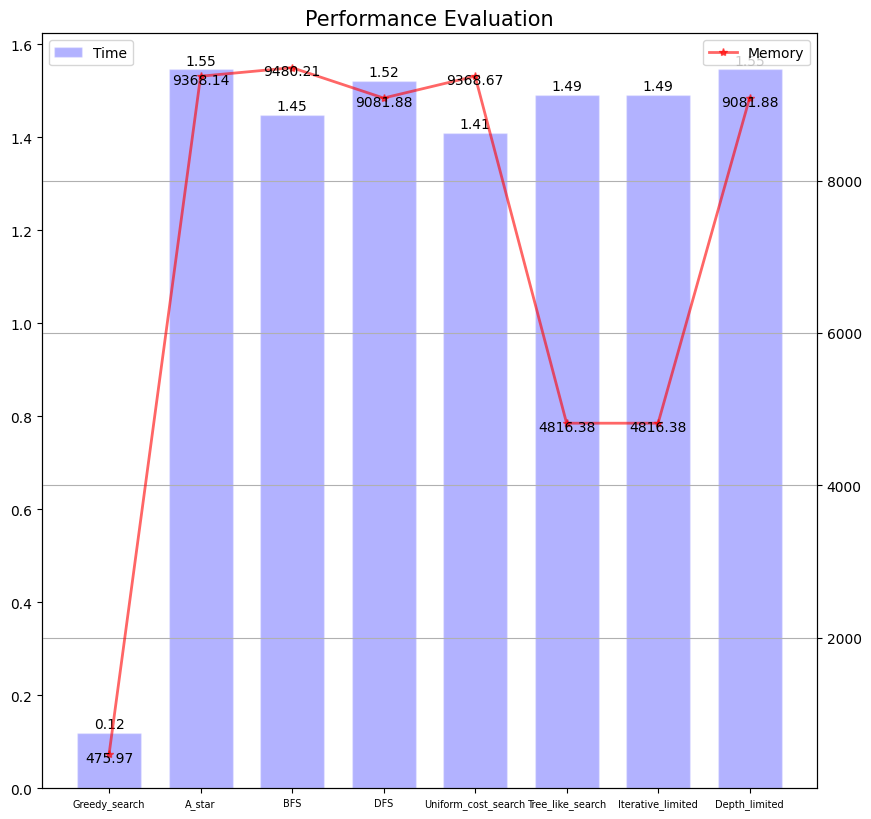

In [87]:
def Comparison2(memory_dict,time_dict,jpgname):
    x = list(memory_dict.keys())
    time = list(time_dict.values())
    space = list(memory_dict.values())

    _, ax1 = plt.subplots(figsize=(10, 10),dpi=100)

    ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
    ax1.set_title("Performance Evaluation", fontsize=15)

    ax2 = ax1.twinx() 
    ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
    ax1.legend(loc=2)
    ax2.legend(loc=1)

    for i,(_x,_y) in enumerate(zip(x,time)):  
        ax1.text(_x,_y+0.01,r'%.2f'%time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

    for i,(_x,_y) in enumerate(zip(x,space)):  
        ax2.text(_x,_y-100,r'%.2f'%space[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

    for label in ax1.get_xticklabels():
    #设置label的大小
        label.set_fontsize(7)

    plt.grid()
    plt.savefig(jpgname)
    plt.show()

Comparison2(memory_dict,time_dict,'Q4.jpg')
# for x,y in zip(x,time):
#     #ha horizontal alignment
#     plt.text(x,y+0.05,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# for x,y in zip(x,space):
#     #ha horizontal alignment
#     plt.text(x,y,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# plt.legend(handles=[l1,l2],labels=['aaa','bbb'],loc='best')



In [ ]:
# x = ['BFS','DFS','Uniform cost search']
# time = [244.1602,214.4529,261.5256]
# space = [1060368,1093080,1079120]
# fig, ax1 = plt.subplots(figsize=(10, 10),dpi=100)



# ax1.bar(x=x, height = time,facecolor='b',width =0.7,edgecolor='white',zorder=1,alpha=0.3,label=u'Time')
# ax1.set_title("Performance Evaluation", fontsize=15)

# ax2 = ax1.twinx() 
# ax2.plot(x,space,color='r',linewidth = 2,marker='*',zorder=2,alpha=0.6,label=u'Memory')
# ax1.legend(loc=1)
# ax2.legend(loc=2)



# for i,(_x,_y) in enumerate(zip(x,time)):  
#     ax1.text(_x,_y+2,time[i],ha='center',color='black',fontsize=10)  #将数值显示在图形上

# for i,(_x,_y) in enumerate(zip(x,space)):  
#     ax2.text(_x,_y+3,space[i],color='black',fontsize=10)  #将数值显示在图形上

# # for x,y in zip(x,time):
# #     #ha horizontal alignment
# #     plt.text(x,y+0.05,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # for x,y in zip(x,space):
# #     #ha horizontal alignment
# #     plt.text(x,y,r'%.2f'%y,ha='center',va='bottom',fontsize=10)

# # plt.legend(handles=[l1,l2],labels=['aaa','bbb'],loc='best')
# plt.grid()
# plt.savefig("coompare.jpg")
# plt.show()

In [88]:
memory_dict

{'Greedy_search': 475.97,
 'A_star': 9368.14,
 'BFS': 9480.21,
 'DFS': 9081.88,
 'Uniform_cost_search': 9368.67,
 'Tree_like_search': 4816.38,
 'Iterative_limited': 4816.38,
 'Depth_limited': 9081.88}

In [89]:
cost_dict

{'Greedy_search': 62854.9827828663,
 'A_star': 49551.521516869434,
 'BFS': 784442.9474281096,
 'Uniform_cost_search': 49551.521516869434,
 'Iterative_limited': 784442.9474281096,
 'Depth_limited': 784442.9474281096}

In [90]:
time_dict

{'Greedy_search': 0.11931435499999907,
 'A_star': 1.5457476390000011,
 'BFS': 1.4478268819999993,
 'DFS': 1.5209732529999997,
 'Uniform_cost_search': 1.4089759409999987,
 'Tree_like_search': 1.4909530859999995,
 'Iterative_limited': 1.4905527340000027,
 'Depth_limited': 1.5455828010000006}